In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import string
import matplotlib.pyplot as plt
#methods and stopwords text processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Machine learning Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
data=pd.read_csv('twitter_Data.csv')
print(data.head())
data.airline_sentiment

             tweet_id airline_sentiment    airline airline_sentiment_gold  \
0  567900433542488064          negative  Southwest                    NaN   
1  569989168903819264          positive  Southwest                    NaN   
2  568089179520954368          positive     United                    NaN   
3  568928195581513728          negative  Southwest                    NaN   
4  568594180014014464          negative     United                    NaN   

            name negativereason_gold  retweet_count  \
0  ColeyGirouard                 NaN              0   
1  WalterFaddoul                 NaN              0   
2      LocalKyle                 NaN              0   
3    amccarthy19                 NaN              0   
4        J_Okayy                 NaN              0   

                                                text tweet_coord  \
0  @SouthwestAir I am scheduled for the morning, ...         NaN   
1  @SouthwestAir seeing your workers time in and ...         NaN   
2 

0        negative
1        positive
2        positive
3        negative
4        negative
           ...   
10975     neutral
10976    positive
10977    negative
10978    negative
10979    negative
Name: airline_sentiment, Length: 10980, dtype: object

In [4]:
data.isnull().sum()

tweet_id                      0
airline_sentiment             0
airline                       0
airline_sentiment_gold    10949
name                          0
negativereason_gold       10956
retweet_count                 0
text                          0
tweet_coord               10204
tweet_created                 0
tweet_location             3550
user_timezone              3577
dtype: int64

[1802, 6851, 2327]


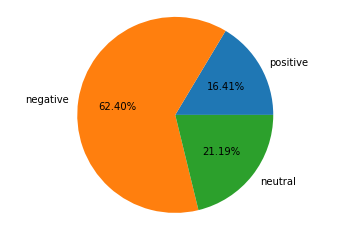

In [5]:
arr=[0,0,0]
label=['positive','negative','neutral']
for row in data.airline_sentiment:
    if row=='negative':
        arr[1]=arr[1]+1
    elif row=='positive':
        arr[0]=arr[0]+1
    elif row=='neutral':
        arr[2]=arr[2]+1
print(arr)        
plt.pie(arr,labels=label,autopct='%.2f%%') 
plt.axis('equal')
plt.show()

### Get rid Unwanted columns


In [6]:
def delete_cols(df,cols):
    for col in cols:
        del df[col]
    return df      

###  Preprocessing the Text

In [7]:
# Creating a stopwords set
sw=set(stopwords.words('english'))
def preprocess_tweet_text(tweet):
    # convert all the text lowercase
    tweet=tweet.lower()
    
    # remove any urls
    tweet=re.sub(r"http\S+|www\S+|http\S+","",tweet, flags=re.MULTILINE)
    
    #remove puncutations
    tweet =tweet.translate(str.maketrans("","",string.punctuation))
    
    #remove user @ References and "#" ,Numbers from tweet
    tweet=re.sub(r'\@\w+|\#',"",tweet)
    #remove stopwords
    tweet_tokens=word_tokenize(tweet)
    filtered_words=[word for word in tweet_tokens if word not in sw]
    
    # Stemming
    ps= PorterStemmer()
    stemmed_words=[ps.stem(w) for w in filtered_words]
    
    #lemmatizing
    lemmatizer=WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w,pos='a') for w in stemmed_words]
    
    return " ".join(lemma_words)

In [8]:
drop_cols = ['airline_sentiment_gold','name','negativereason_gold','tweet_id', 'retweet_count','tweet_created','user_timezone','tweet_coord','tweet_location']

delete_cols(data,drop_cols)

,airline_sentiment,airline,text
0,negative,Southwest,"@SouthwestAir I am scheduled for the morning, ..."
1,positive,Southwest,@SouthwestAir seeing your workers time in and ...
2,positive,United,@united Flew ORD to Miami and back and had gr...
3,negative,Southwest,@SouthwestAir @dultch97 that's horse radish 😤🐴
4,negative,United,@united so our flight into ORD was delayed bec...
...,...,...,...
10975,neutral,American,@AmericanAir followback
10976,positive,United,@united thanks for the help. Wish the phone re...
10977,negative,US Airways,@usairways the. Worst. Ever. #dca #customerser...
10978,negative,US Airways,@nrhodes85: look! Another apology. DO NOT FLY ...


In [9]:
data.tail()

,airline_sentiment,airline,text
10975,neutral,American,@AmericanAir followback
10976,positive,United,@united thanks for the help. Wish the phone re...
10977,negative,US Airways,@usairways the. Worst. Ever. #dca #customerser...
10978,negative,US Airways,@nrhodes85: look! Another apology. DO NOT FLY ...
10979,negative,United,@united you are by far the worst airline. 4 pl...


In [10]:
data_index = data.index
for index, row in data.iterrows():
    tweet=row.text
    tweet=preprocess_tweet_text(tweet)
    tweet = " %s %s" % (tweet, row.airline)
    row.text = tweet

In [11]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

for index, row in data.iterrows():
    row.text = deEmojify(row.text)


In [12]:
data.head()

,airline_sentiment,airline,text
0,negative,Southwest,southwestair schedul morn 2 day fact yesnot s...
1,positive,Southwest,southwestair see worker time time go beyond l...
2,positive,United,unit flew ord miami back great crew servic le...
3,negative,Southwest,southwestair dultch97 that hors radish South...
4,negative,United,unit flight ord delay air forc one last fligh...


In [13]:
data.head()

,airline_sentiment,airline,text
0,negative,Southwest,southwestair schedul morn 2 day fact yesnot s...
1,positive,Southwest,southwestair see worker time time go beyond l...
2,positive,United,unit flew ord miami back great crew servic le...
3,negative,Southwest,southwestair dultch97 that hors radish South...
4,negative,United,unit flight ord delay air forc one last fligh...


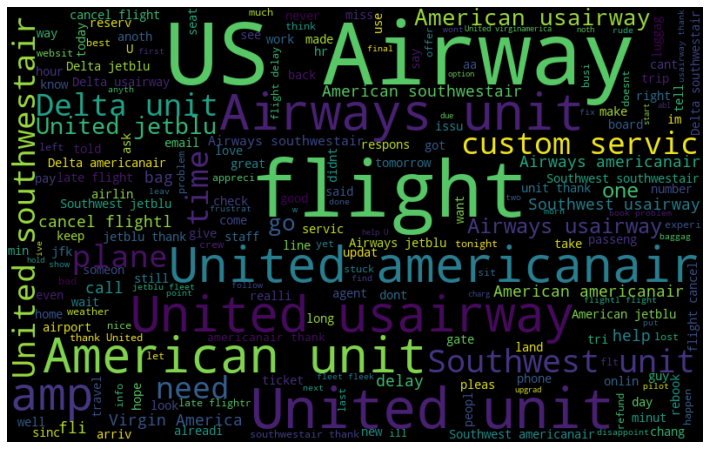

In [14]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in data['text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

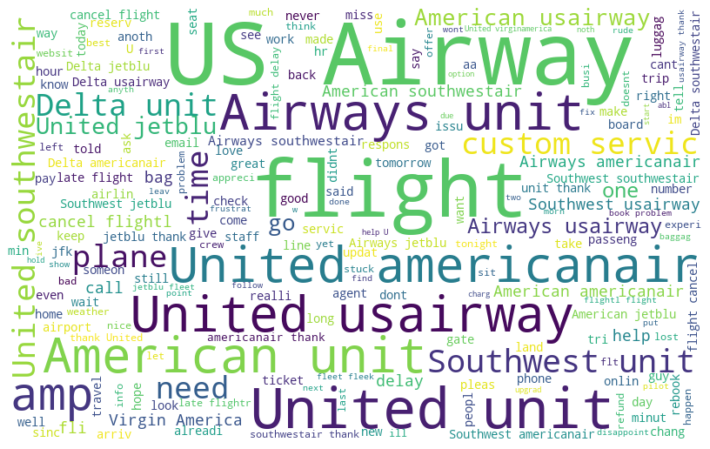

In [15]:
# frequent words visualization for +ve
all_words_pos = " ".join([sentence for sentence in data['text'][data['airline_sentiment']=='positive']])

wordcloud = WordCloud(width=800, height=500, random_state=42,background_color="white", max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

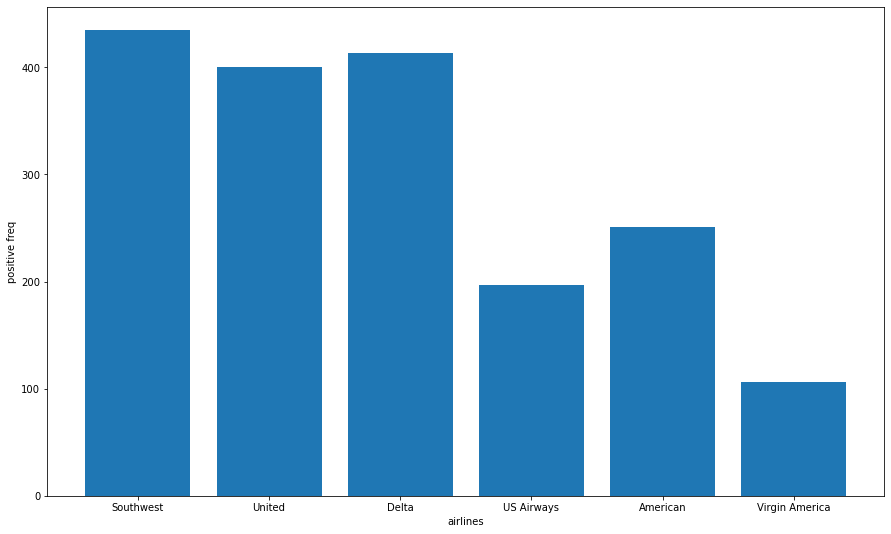

In [16]:
all_words_pos = ([sentence for sentence in data['airline'][data['airline_sentiment']=='positive']])
freq = nltk.FreqDist(all_words_pos)
d = pd.DataFrame({'airline': list(freq.keys()),
                 'Count': list(freq.values())})
plt.figure(figsize=(15,9))
plt.ylabel('positive freq')
plt.xlabel('airlines')
plt.bar( d.airline, d.Count)
plt.show()

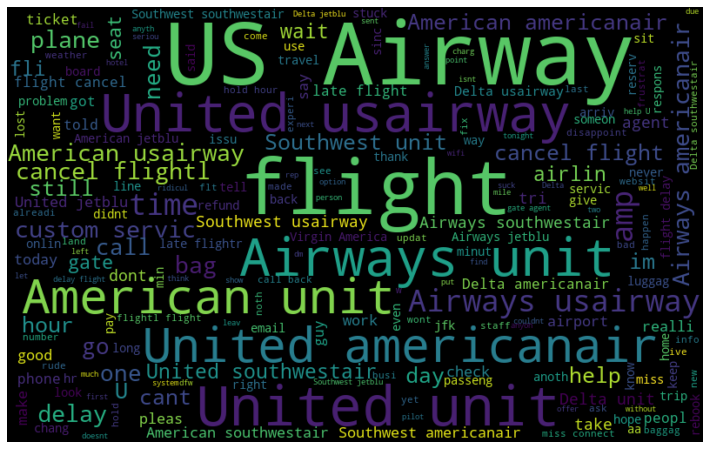

In [17]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in data['text'][data['airline_sentiment']=='negative']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

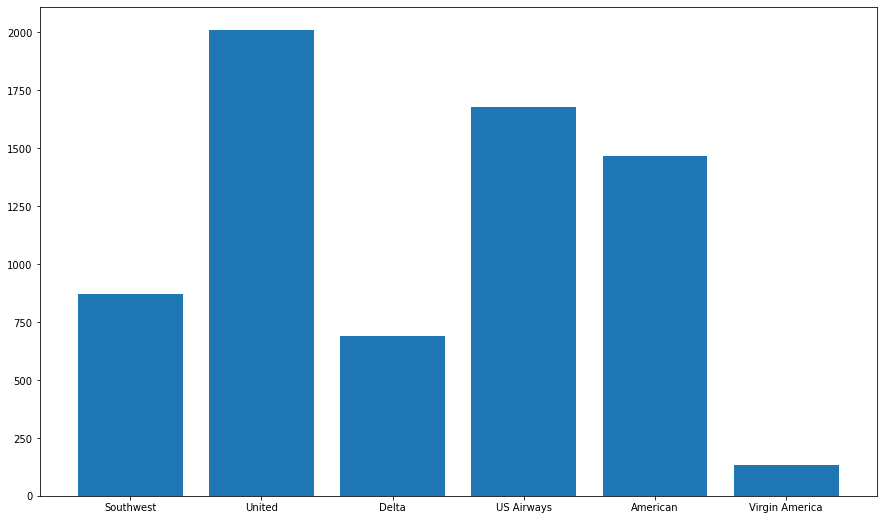

In [18]:
all_words_pos = ([sentence for sentence in data['airline'][data['airline_sentiment']=='negative']])
freq = nltk.FreqDist(all_words_pos)
d = pd.DataFrame({'airline': list(freq.keys()),
                 'Count': list(freq.values())})
plt.figure(figsize=(15,9))
plt.bar( d.airline, d.Count)
plt.show()

In [19]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(data,data.airline_sentiment)
print(data.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10980, 3)
(8235, 3)
(2745, 3)
(8235,)
(2745,)


In [20]:
y_train

9875    negative
3083    negative
8446    positive
7821    negative
8609    negative
          ...   
8335     neutral
3642    positive
6031     neutral
5646    negative
1308     neutral
Name: airline_sentiment, Length: 8235, dtype: object

In [21]:
print(y_train.head())
x_test.head()

9875    negative
3083    negative
8446    positive
7821    negative
8609    negative
Name: airline_sentiment, dtype: object


,airline_sentiment,airline,text
8451,negative,United,unit custom servic experi tweet qualiti assur...
9945,neutral,US Airways,usairway found flight want cheapoair american...
2208,negative,United,unit would help could refresh board time info...
4599,negative,US Airways,usairway real life exercis crisi manag usairw...
9783,positive,US Airways,usairway appreci prompt respons US Airways


In [22]:
from sklearn.metrics import f1_score,accuracy_score,precision_score

In [23]:
v = TfidfVectorizer(analyzer='word', max_features=1100, max_df = 0.8, ngram_range=(1,2))
train_features= v.fit_transform(x_train.text)
test_features=v.transform(x_test.text)
v.vocabulary_

{'jetblu': 527,
 'cant': 160,
 'drive': 289,
 'see': 813,
 'class': 190,
 'theyr': 926,
 'answer': 83,
 'phone': 711,
 'call': 151,
 'delta': 253,
 'answer phone': 84,
 'phone call': 712,
 'unit': 982,
 'bag': 122,
 'sent': 819,
 'lax': 555,
 'promis': 741,
 'good': 436,
 'hotel': 478,
 'get': 418,
 'united': 1004,
 'usairway': 1015,
 'flight': 365,
 'thank': 915,
 'us': 1010,
 'airways': 57,
 'usairway flight': 1019,
 'thank us': 923,
 'us airways': 1013,
 'guess': 443,
 'someon': 850,
 'americanair': 67,
 'think': 928,
 'week': 1058,
 'wait': 1043,
 'enough': 306,
 'time': 936,
 'contact': 211,
 'lose': 584,
 'custom': 232,
 'american': 66,
 'rt': 793,
 'fleet': 359,
 'fleek': 357,
 'rt jetblu': 794,
 'jetblu fleet': 529,
 'fleet fleek': 360,
 'fleek delta': 358,
 'realli': 755,
 'okay': 681,
 'sit': 841,
 'kid': 541,
 'away': 112,
 'land': 549,
 'failur': 336,
 'want': 1046,
 'enter': 307,
 'famili': 337,
 'say': 808,
 'websit': 1056,
 'pleas': 723,
 'still': 881,
 'southwestair': 8

In [24]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
mnb=MultinomialNB()
# Train
mnb.fit(train_features,y_train)
#predictions
pred1=mnb.predict(test_features)

a=f1_score(y_test,pred1,average=None)
d1=precision_score(y_test,pred1, average='micro') 
b=accuracy_score(y_test,pred1)
print(a)
print(b)
print(d1)

[0.84240102 0.38323353 0.61621622]
0.7420765027322405
0.7420765027322405


In [25]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

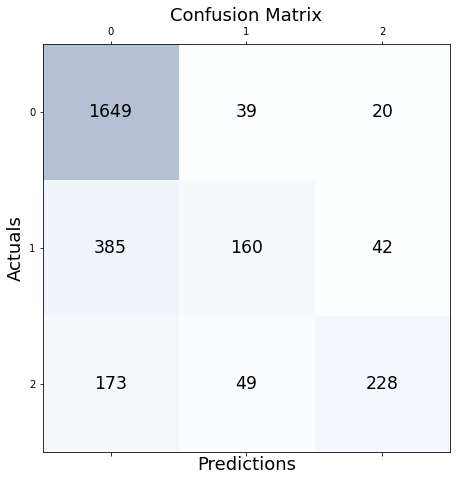

In [26]:
conf_matrix =confusion_matrix(y_test,pred1)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [27]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

    negative       0.75      0.97      0.84      1708
     neutral       0.65      0.27      0.38       587
    positive       0.79      0.51      0.62       450

    accuracy                           0.74      2745
   macro avg       0.73      0.58      0.61      2745
weighted avg       0.73      0.74      0.71      2745



In [28]:
clf = LogisticRegression(C = 2.1, solver='liblinear', multi_class='auto')
clf.fit(train_features,y_train)
pred = clf.predict(test_features)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.81      0.93      0.87      1708
     neutral       0.64      0.46      0.53       587
    positive       0.73      0.60      0.66       450

    accuracy                           0.77      2745
   macro avg       0.73      0.66      0.69      2745
weighted avg       0.76      0.77      0.76      2745



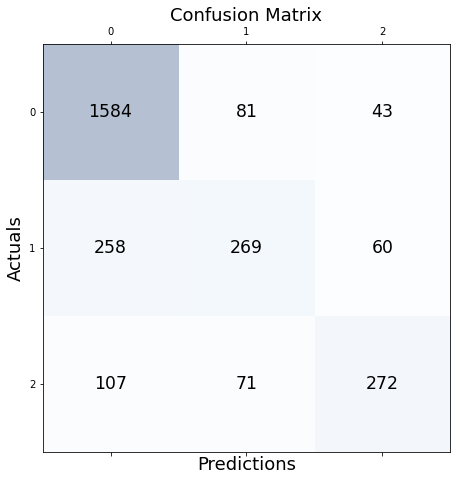

In [29]:
conf_matrix =confusion_matrix(y_test,pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [30]:
model = SVC(kernel="linear", C= 0.96 , gamma = 'scale')
# clf = SVC(C = 1000, gamma = 0.001)
model.fit(train_features,y_train)
pred2 = model.predict(test_features)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

    negative       0.82      0.92      0.86      1708
     neutral       0.62      0.48      0.54       587
    positive       0.72      0.60      0.66       450

    accuracy                           0.77      2745
   macro avg       0.72      0.67      0.69      2745
weighted avg       0.76      0.77      0.76      2745



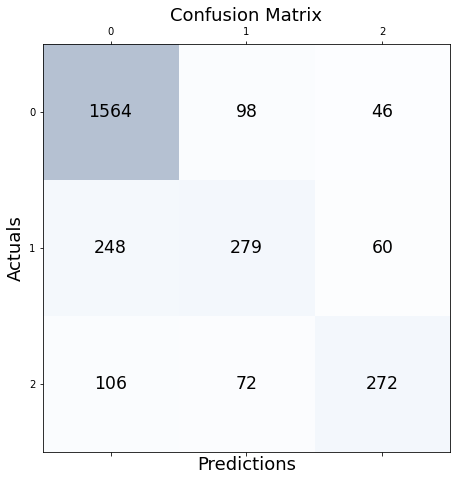

In [31]:
conf_matrix =confusion_matrix(y_test,pred2)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train_features,y_train)
pred3 = model_knn.predict(test_features)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

    negative       0.79      0.78      0.78      1708
     neutral       0.41      0.49      0.45       587
    positive       0.63      0.48      0.54       450

    accuracy                           0.67      2745
   macro avg       0.61      0.58      0.59      2745
weighted avg       0.68      0.67      0.67      2745



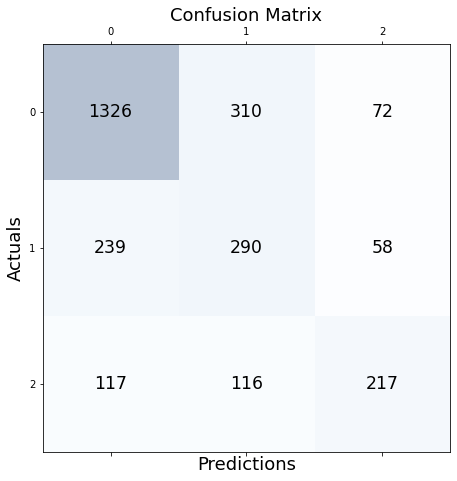

In [33]:
conf_matrix =confusion_matrix(y_test,pred3)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()